In [33]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Taz_Water.csv')

In [13]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [37]:
df.shape

(59400, 41)

# Explorations of Problems

In [14]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [22]:
df.groupby('quantity').count()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
quantity,,,,,,,,,,,,,,,,,,,,,
dry,6246,6246,6246,5781,6246,5782,6246,6246,6246,6246,...,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246
enough,33186,33186,33186,31963,33186,31964,33186,33186,33186,33186,...,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186
insufficient,15129,15129,15129,13950,15129,13940,15129,15129,15129,15129,...,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129
seasonal,4050,4050,4050,3414,4050,3415,4050,4050,4050,4050,...,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050
unknown,789,789,789,657,789,644,789,789,789,789,...,789,789,789,789,789,789,789,789,789,789


# The qunatity of Water per Well

### What is the quantity of Water per Well?

In [69]:
b = df.groupby(['status_group', 'quantity']).count()['id'].reset_index()

px.bar(x = b['quantity'], y = b['id'], color = b['status_group'],text_auto=True, barmode="group",
      title="The Quantity of Water per Status of Well",
       labels={'x':'Quantity', 'y':'Number of Wells', 'color':'Status of Well'})


# Distribution of Amount of water avaiable 

## Use tableu to plot the geo locations

<AxesSubplot:ylabel='Frequency'>

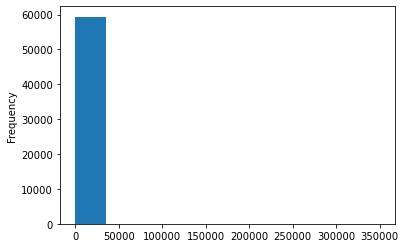

In [119]:
df['amount_tsh'].plot(kind = 'hist')

# Distribution of Amount of water avaiable 

In [64]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [65]:
bas = df.groupby(['status_group', 'scheme_management']).count()['id'].reset_index()
bas.head()

,status_group,scheme_management,id
0,functional,Company,534
1,functional,None,1
2,functional,Other,458
3,functional,Parastatal,966
4,functional,Private operator,729


In [78]:

px.bar(x = bas['scheme_management'], y = bas['id'], color = bas['status_group'],text_auto=True, barmode="group",
      title="Who Operates the Waterpoint per Status of Well",
       labels={'x':'Operator', 'y':'Number of Wells', 'color':'Status of Well'})

# Drinkable or Undrinkable Water

In [77]:
'village water committee'
'Water User Groups'
'Water User Associations'

'Water User Associations'

In [105]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [104]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [114]:
water_q = {'good': 'Drinkable', 'salty':'Undrinkable', 'unknown': 'Undrinkable', 
          'milkly': 'Undrinkable', 'coloured':'Undrinkable', 'fluoride': 'Undrinkable'}

In [115]:
df['binary_water_qual'] = df['quality_group'].map(water_q)

In [116]:
df['binary_water_qual'].value_counts()

Drinkable      50818
Undrinkable     7288
Name: binary_water_qual, dtype: int64

In [117]:
water = df.groupby(['status_group', 'binary_water_qual']).count()['id'].reset_index()
water.head()

,status_group,binary_water_qual,id
0,functional,Drinkable,28760
1,functional,Undrinkable,2815
2,functional needs repair,Drinkable,3904
3,functional needs repair,Undrinkable,345
4,non functional,Drinkable,18154


In [120]:
px.bar(x = water['binary_water_qual'], y = water['id'], color = water['status_group'],text_auto=True, barmode="group",
      title="Drinkable Water per Status of Well",
       labels={'x':'Water Quality', 'y':'Number of Wells', 'color':'Status of Well'})

# What type of Extration is the Wells using

In [80]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [81]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [82]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [83]:
extra = df.groupby(['status_group', 'extraction_type_class']).count()['id'].reset_index()
extra.head()

,status_group,extraction_type_class,id
0,functional,gravity,16048
1,functional,handpump,10375
2,functional,motorpump,1135
3,functional,other,1029
4,functional,rope pump,293


In [93]:
px.bar(x = extra['extraction_type_class'], y = extra['id'], color = extra['status_group'],text_auto=True, barmode="group",
      title="Who Operates the Waterpoint per Status of Well",
       labels={'x':'Extraction Type', 'y':'Number of Wells', 'color':'Status of Well'})